# Pymaceuticals Inc.
---

<font size="3"><b>### Analysis Instructions: <br>
    Review all the figures and tables that you generated; <br>
    write at least three observations or inferences that can be made from the data.</font></b><br>

<b>Variance:</b> <br>
    <b>Highest Variance Drug Regimen:</b> Ketapril has the highest variance of 68.55 in this dataset, therefore Ketapril's data points are scattered more widely from the mean, & thus would be considered the least consistent Drug Regimen in this dataset.<br>
    <b>Lowest Variance Drug Regimen:</b> Ramicane has the lowest variance of 23.49 in this dataset, therefore Ramicane is the most consistent drug regimen.<br><br>

<b>Standard Deviation:</b> <br>
    <b>Highest STD:</b> Ketapril has the highest STD at 8.28, and thus has the lowest consistency & lowest reliability of the drug regimens.<br>
    <b>Lowest STD:</b> Ramicane has the lowest STD at 4.85, and thus has the greatest consistency & greatest reliability of the drug regimens.<br><br>

<b>SEM(Standard Error of the Mean):</b><br>
    <b>Highest SEM:</b> Ketapril has the highest SEM at 0.6023, and thus indicates that the sample mean is less precise in this drug regimen.<br>
    <b>Lowest SEM:</b> Ramicane has the lowest SEM at 0.3202, and thus indicates that the sample mean is more reliable estimate of the true population mean.<br><br>

<b>Conclusion:</b> According to the variance, standard deviation, & standard error of the mean, this datasets <font color="#00914D"><b>most reliable and consistent drug regimen</b></font> for shrinking tumor volume is <font color="#00914D"><b>Ramicane</b></font>; conversely, the <font color="#FF2B00"><b>least reliable and least consistent</b></font> drug regimen in this dataset is overwhelmingly <font color="#FF2B00"><b>Ketapril</b></font>. Based on this information, I would recommend that <font color="##BD006E"><b>the Ketapril study be ended and its finances applied to the further study of Ramicane</b></font>. The <font color="##BD006E"><b>box plot created from this dataset also visually illustrates this finding</b></font>, despite that it includes only four of the ten drug regimens in this dataset (drug regimens include a placebo).<br><br>

<b>Correlation:</b> <br>
The correlation between mouse weight and the tumor volume is 0.84, and thus indicates a <b>strong relationship</b> between the mouse’s weight and the volume of it’s tumor.<br>

<b>Linear Regression:</b> <br>
<b>R-squared:</b> <br>
The R-squared for mouse weight and tumor volume is 0.71, which indicates that about <b>70%  of the variability</b> in the tumor volume can be <b>explained by the changes in the mouse’s weight</b>; which indicates a <b>relatively strong relationship</b> between weight and the volume of the tumor. Therefore, <b>with relatively high degree of accuracy,</b> knowing the <b>weight of a subject can help predict the tumor volume</b>. Despite this strong relationship, 29% of the variability in tumor volume in not explained by weight, which is attributed to other factors not included in this data. The <b>strong association between these two variables</b>, does not imply causation! More analysis and experimentation would be needed to establish causation. 



In [217]:
%matplotlib inline

In [218]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress, ttest_ind

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [219]:
# Checking the number of mice.
mouse_count = mouse_study["Mouse ID"].nunique()
print(f'There are {mouse_count} unique Mouse IDs in this study.')

There are 249 unique Mouse IDs in this study.


In [220]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouseID = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"])]['Mouse ID'].unique()
print(f"Duplicate Mouse ID: {duplicated_mouseID}")

Duplicate Mouse ID: ['g989']


In [221]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouseID = mouse_study.loc[(mouse_study['Mouse ID'] == 'g989')]
duplicated_mouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [222]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. #Shows g989's 13 rows are removed
clean_mouse_study= mouse_study.loc[(mouse_study['Mouse ID'] != 'g989')]
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [223]:
# Checking the number of mice in the clean DataFrame.
print(f"The number of mice in clean Dataframe is {clean_mouse_study['Mouse ID'].nunique()}")

The number of mice in clean Dataframe is 248


## Summary Statistics

In [252]:
#Determine how many 'regimens' there are for the DataFrame organizing 
clean_mouse_study['Drug Regimen'].unique()


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [225]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_data = clean_mouse_study.groupby("Drug Regimen")

tumor_mean = round(regimen_data['Tumor Volume (mm3)'].mean(), 2)
tumor_median = round(regimen_data['Tumor Volume (mm3)'].median(), 2) 
tumor_variance = round(regimen_data['Tumor Volume (mm3)'].var(), 2)
tumor_stdev = round(regimen_data['Tumor Volume (mm3)'].std(), 2)
tumor_sem = round(regimen_data['Tumor Volume (mm3)'].sem(ddof=0), 4)

#Assemble the resulting series into a single summary DataFrame.
regimen_stat = {"Mean": tumor_mean,
            "Median ": tumor_median,
            "Variance": tumor_variance,
            "Std Deviation.": tumor_stdev,
            "SEM": tumor_sem
                 }
regimen_stat_df = pd.DataFrame(regimen_stat)
regimen_stat_df.columns=pd.MultiIndex.from_product([['Tumor Volume Summary Statistics'], regimen_stat_df.columns])
regimen_stat_df

Tumor Volume Summary Statistics                                  \
                                        Mean Median  Variance Std Deviation.   
Drug Regimen                                                                   
Capomulin                              40.68   41.56    24.95           4.99   
Ceftamin                               52.59   51.78    39.29           6.27   
Infubinol                              52.88   51.82    43.13           6.57   
Ketapril                               55.24   53.70    68.55           8.28   
Naftisol                               54.33   52.51    66.17           8.13   
Placebo                                54.03   52.29    61.17           7.82   
Propriva                               52.32   50.45    43.85           6.62   
Ramicane                               40.22   40.67    23.49           4.85   
Stelasyn                               54.23   52.43    59.45           7.71   
Zoniferol                              53.24   51.82    48.53           6.97   

                      
                 SEM  
Drug Regimen          
Capomulin     0.3286  
Ceftamin      0.4685  
Infubinol     0.4909  
Ketapril      0.6023  
Naftisol      0.5949  
Placebo       0.5797  
Propriva      0.5425  
Ramicane      0.3202  
Stelasyn      0.5715  
Zoniferol     0.5150

In [226]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = clean_mouse_study.groupby(['Drug Regimen']).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_aggregation 

/var/folders/6w/fvcr_6pj6t54c0m51vn7b3gw0000gn/T/ipykernel_32383/1089056713.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_aggregation = clean_mouse_study.groupby(['Drug Regimen']).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

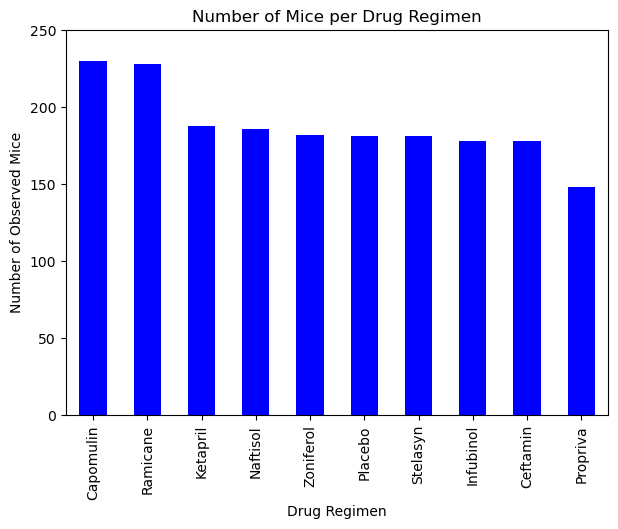

<Figure size 640x480 with 0 Axes>

In [227]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_plot = clean_mouse_study["Drug Regimen"].value_counts().plot(kind="bar", color='blue', figsize=(7,5), fontsize=14)

pandas_plot.set_xlabel("Drug Regimen", size = 10)
pandas_plot.set_ylabel("Number of Observed Mice", size = 10)
plt.title("Number of Mice per Drug Regimen", size= 12)
plt.ylim(0, max(clean_mouse_study["Drug Regimen"].value_counts() +20))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()
plt.tight_layout()


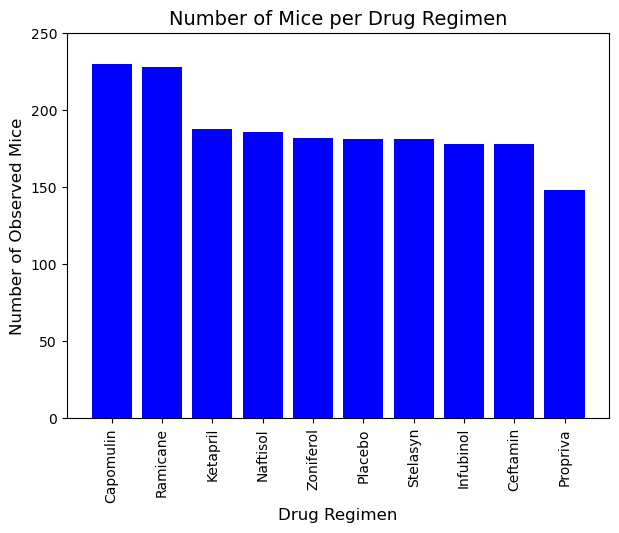

<Figure size 640x480 with 0 Axes>

In [241]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.o = clean_mouse_study["Drug Regimen"].value_counts()
pyplot = clean_mouse_study["Drug Regimen"].value_counts()

plt.figure(figsize=(7,5))
plt.bar(barchart_two.index, barchart_two.values, color="blue")
plt.title("Number of Mice per Drug Regimen", size = 14)
plt.xlabel("Drug Regimen", size = 12)
plt.ylabel("Number of Observed Mice", size = 12)
plt.ylim(0, max(clean_mouse_study["Drug Regimen"].value_counts() + 20))
plt.xticks(rotation="vertical", fontsize=10)
plt.yticks(fontsize=10)

plt.show()
plt.tight_layout()


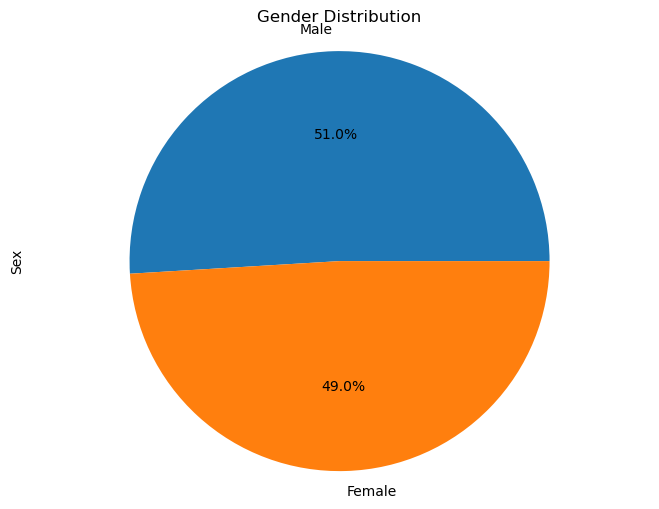

<Figure size 640x480 with 0 Axes>

In [242]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_mouse_study["Sex"].value_counts()

plt.figure()
fig=gender_distribution.plot(kind="pie", title="Gender Distribution", y= gender_distribution.index, autopct= "%1.1f%%", figsize=(8, 6),labels = gender_distribution.index)
plt.axis('equal')
plt.show()
plt.tight_layout()


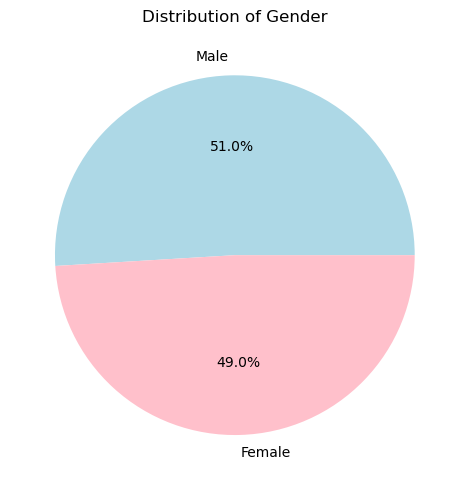

In [245]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["lightblue","pink"]
labels = gender_distribution.index
plt.figure(figsize=(7,5))
plt.pie(gender_distribution, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Distribution of Gender")

plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [231]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_treatments = four_treatments[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = four_treatments.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_lastp = max_timepoint.merge(clean_mouse_study[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]], on = ["Mouse ID", "Timepoint"], how = "left") 
tumor_vol_lastp

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [232]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = tumor_vol_lastp.loc[tumor_vol_lastp["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


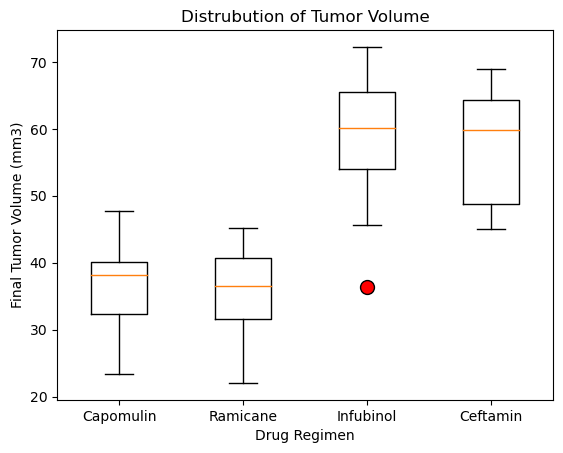

<Figure size 640x480 with 0 Axes>

In [246]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
fig = ax1.boxplot(tumor_volume_data, labels=treatments,  \
                 flierprops = dict(marker = "o", markersize=10, markerfacecolor = "red"))
ax1.set_title('Distrubution of Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()
plt.tight_layout()


## Line and Scatter Plots

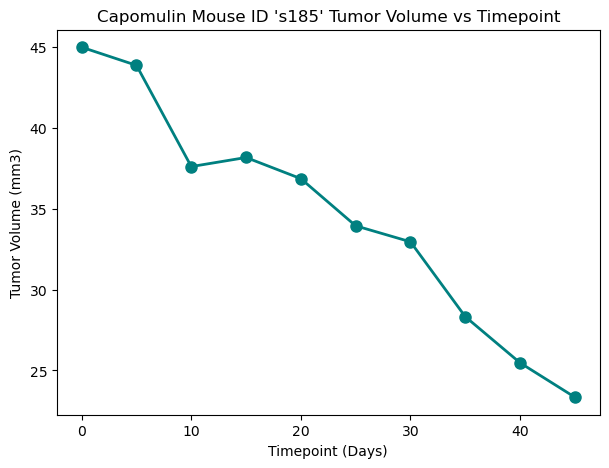

<Figure size 640x480 with 0 Axes>

In [247]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] =="Capomulin",:]
capomulin_df

capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
capomulin_mouse

x_axis = capomulin_mouse["Timepoint"]
capomulin_tumor_vol = capomulin_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(7,5))
plt.title("Capomulin Mouse ID 's185' Tumor Volume vs Timepoint", fontsize=12)
plt.plot(x_axis, capomulin_tumor_vol, linewidth=2, markersize=8, marker="o", color="teal", label="mm3")
plt.xlabel("Timepoint (Days)", fontsize=10)
plt.ylabel("Tumor Volume (mm3)", fontsize=10)

plt.show()
plt.tight_layout()


/var/folders/6w/fvcr_6pj6t54c0m51vn7b3gw0000gn/T/ipykernel_32383/3983888692.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_mouse_weight = capomulin_df.groupby(['Mouse ID']).mean()


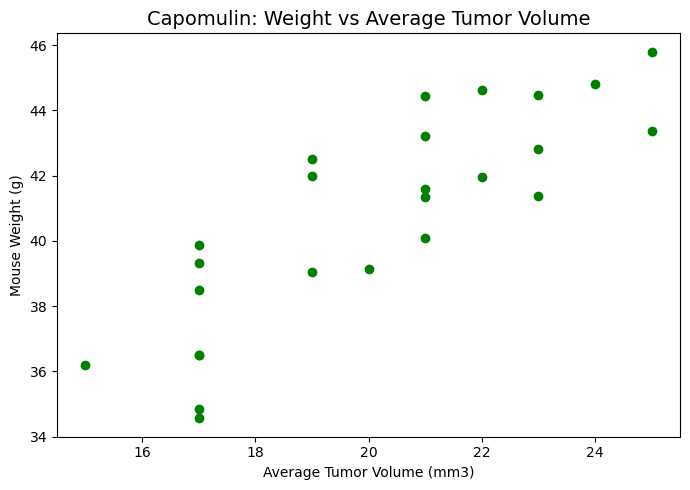

In [248]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == 'Capomulin'),:]
average_mouse_weight = capomulin_df.groupby(['Mouse ID']).mean()

plt.figure(figsize=(7,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.scatter(average_mouse_weight['Weight (g)'], average_mouse_weight['Tumor Volume (mm3)'], color="green")
plt.title('Capomulin: Weight vs Average Tumor Volume', fontsize=14)
plt.xlabel('Average Tumor Volume (mm3)', fontsize=10)
plt.ylabel('Mouse Weight (g)', fontsize=10)
plt.show
plt.tight_layout()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.71


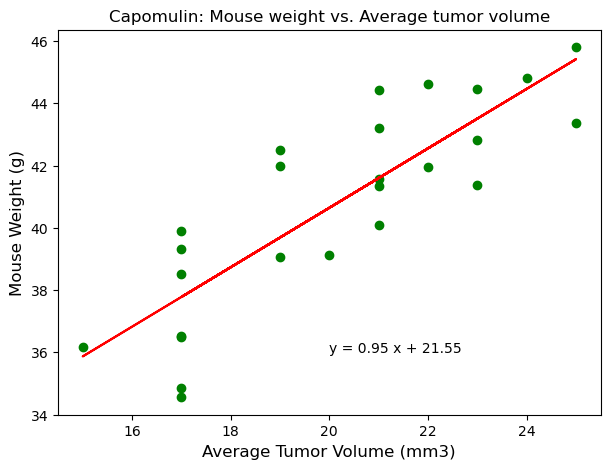

<Figure size 640x480 with 0 Axes>

In [249]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_mouse_weight['Weight (g)'], average_mouse_weight['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= linregress(average_mouse_weight["Weight (g)"],average_mouse_weight["Tumor Volume (mm3)"])
regress_values=average_mouse_weight["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f"The r-squared is: {round(rvalue**2, 2)}")

plt.figure(figsize=(7,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.scatter(average_mouse_weight["Weight (g)"],average_mouse_weight["Tumor Volume (mm3)"], color="green")
plt.plot(average_mouse_weight["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=10)
plt.title('Capomulin: Mouse weight vs. Average tumor volume', size =12)
plt.xlabel('Average Tumor Volume (mm3)', size =12)
plt.ylabel('Mouse Weight (g)', size =12)
plt.show()
plt.tight_layout()
